<a href="https://colab.research.google.com/github/Snupix031/Vid/blob/main/filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from skimage import data, img_as_float
from skimage.util import random_noise
import skimage.io
from scipy.io import loadmat
import skimage.filters

from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

file_path = "C:/Users/domin/OneDrive/Desktop/Vid-projekt/Vid/rit18_data.mat"

dataset = loadmat('C:/Users/domin/OneDrive/Desktop/Vid-projekt/Vid/rit18_data.mat')

#Load Training Data and Labels
train_data = dataset['train_data']
train_mask = train_data[-1]
train_data = train_data[:6]
train_labels = dataset['train_labels']

#Load Validation Data and Labels
val_data = dataset['val_data']
val_mask = val_data[-1]
val_data = val_data[:6]
val_labels = dataset['val_labels']

#Load Test Data
test_data = dataset['test_data']
test_mask = test_data[1]
test_data = test_data[:6]

band_centers = dataset['band_centers'][0]
band_center_units = dataset['band_center_units']
classes = dataset['classes']   


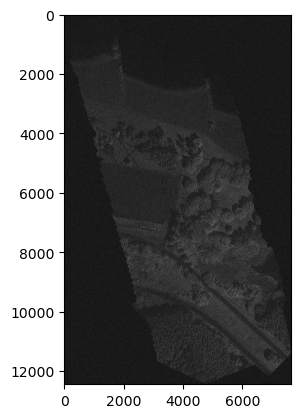

In [ ]:
original = img_as_float(test_data[5,:,:])
sigma = 0.155
noisy3 = random_noise(original, var=sigma**1.5)
plt.imshow(noisy3,'gray')

In [ ]:
denoised_image_tv = skimage.restoration.denoise_tv_chambolle(noisy3)
denoised_image_bilateral = skimage.restoration.denoise_bilateral(noisy3)

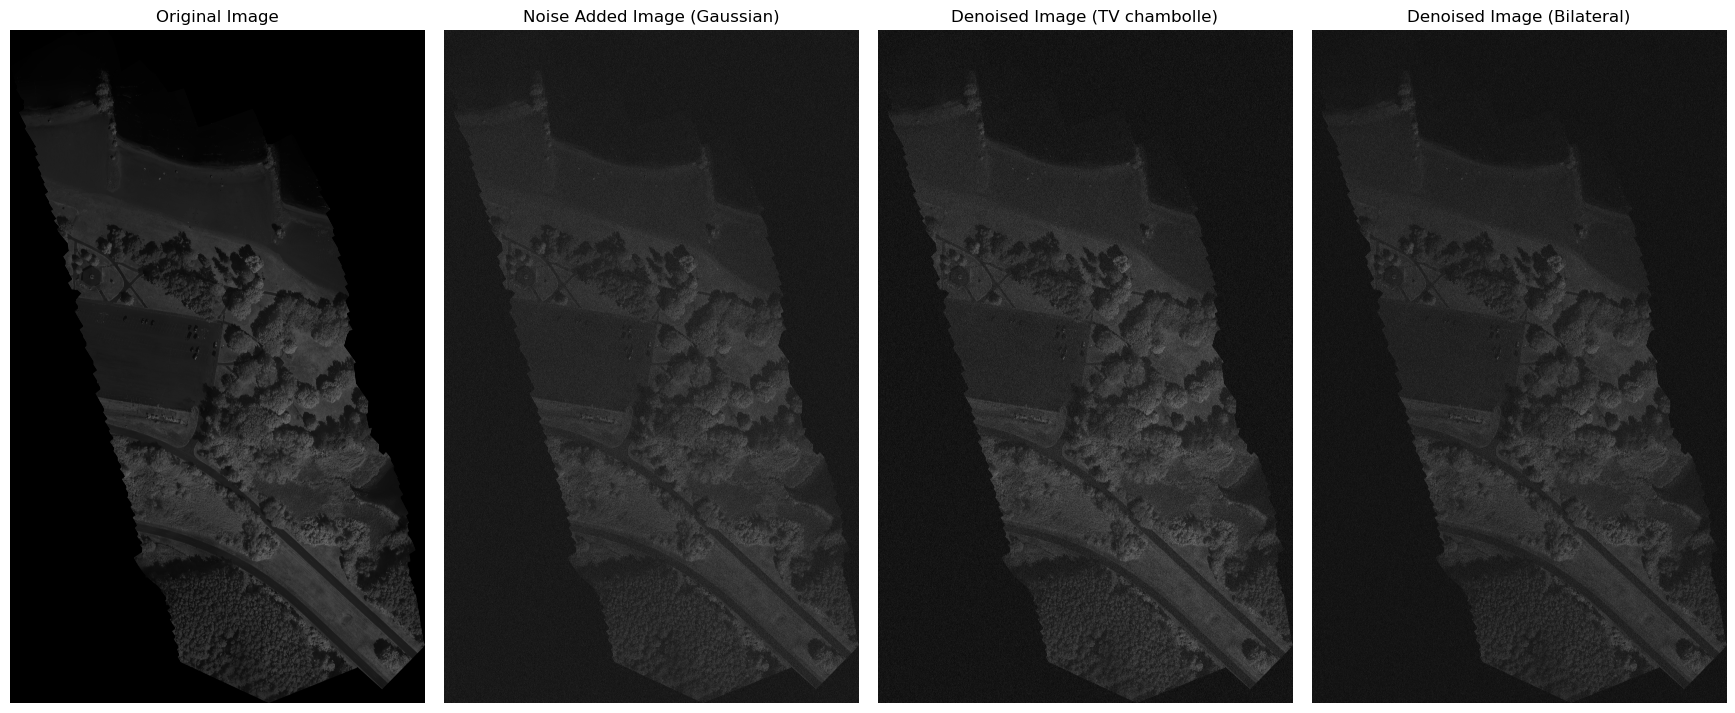

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18, 15), sharey=True)
ax = ax.ravel()
ax[0].imshow(original,'gray')
ax[0].set_title('Original Image')
ax[1].imshow(noisy3,'gray')
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(denoised_image_tv,'gray')
ax[2].set_title('Denoised Image (TV chambolle)')
ax[3].imshow(denoised_image_bilateral,'gray')
ax[3].set_title('Denoised Image (Bilateral)')
fig.tight_layout()
for a in ax:
    a.axis('off')